# Analyse de Clustering et de Classification sur le Jeu de Données des Maladies Cardiaques

### 1.Préparation des Données :

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('Medicaldataset.csv')
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [17]:
valeurs_nulles = df.isnull().sum()
print(valeurs_nulles)
#Dans un premier temps on cherche à identifier les valeurs null dans le cas où nous aurions besoin de les traiter.
#Cependant ici nous n'en avons pas.

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [18]:
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})
print(df.head(10))
#Encodage des valeurs catégorielle

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   
5   58       0          61                      112                        58   
6   32       0          40                      179                        68   
7   63       1          60                      214                        82   
8   44       0          60                      154                        81   
9   67       1          61                      160                        95   

   Blood sugar   CK-MB  Troponin  Result  
0        160.0    1.80     0.012       0  
1        296.0    6.75

### Arbre de décision

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#import scpécifique à l'algorithme

In [24]:
X = df.drop(['Result'], axis=1) 
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Création des variable de test et d'entrainement  
# On choisi ici 20% de l'échantillon pour les test et par conséquant 80% pour l'entrainement

In [25]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
#On instancie l'arbre et on l'entraine sur nos variable dédié à l'entrainement

DecisionTreeClassifier(random_state=42)

In [26]:
# Faire des prédictions
y_pred = clf.predict(X_test)

# Évaluer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


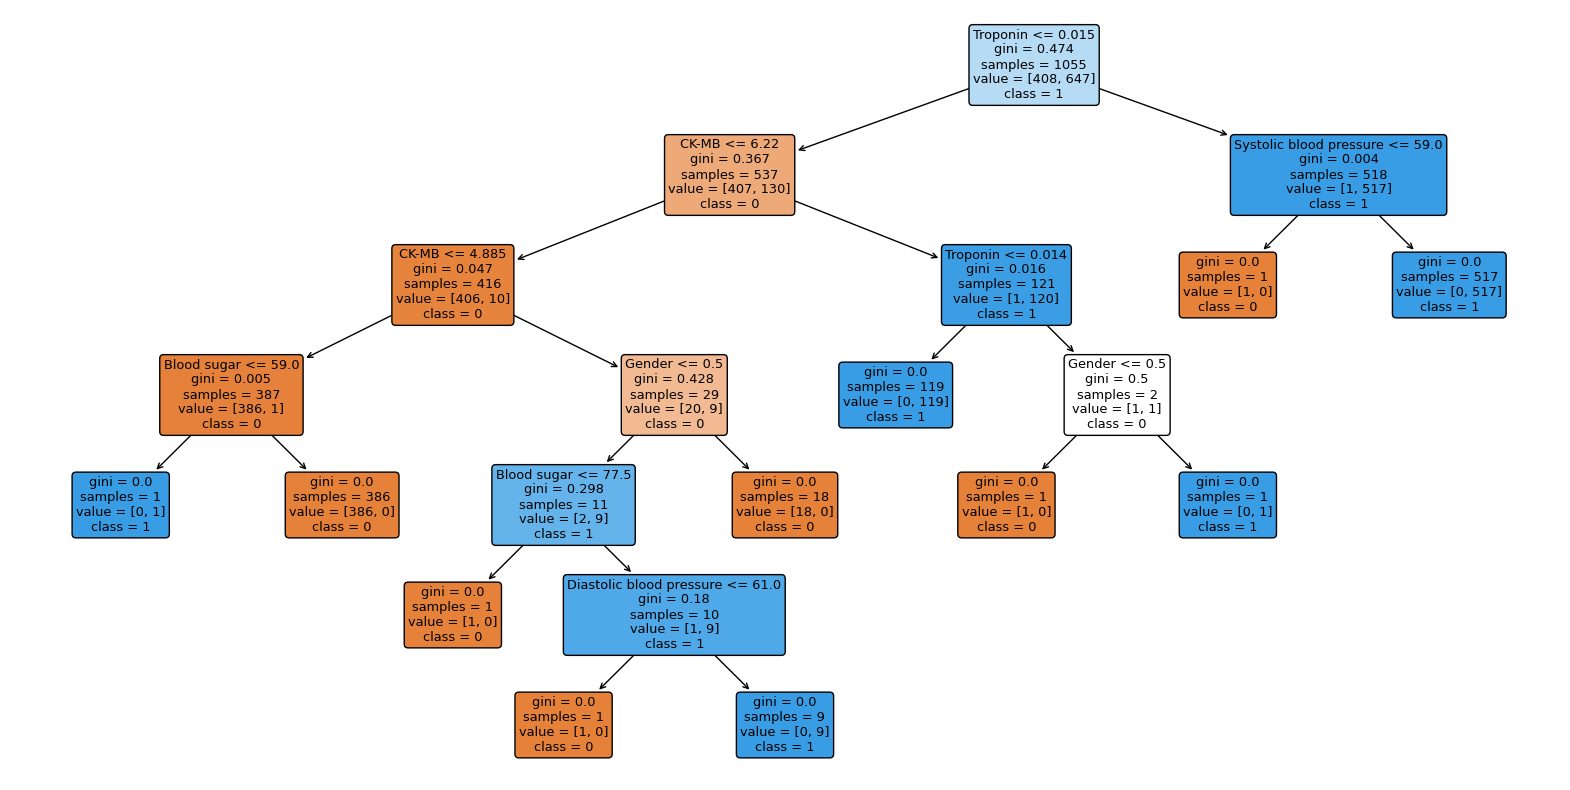

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convertir les noms des colonnes en une liste
feature_names_list = X.columns.tolist()

# Utilisation de plot_tree avec la liste des noms des caractéristiques
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=['0', '1'], rounded=True)
plt.show()


#### Ainsi on obtient cette visualisation de l' arbre de decision généré, qui obtient une precision de 98% et prenant en paramétre 20% de l'échantillon pour les tests et par conséquant 80% pour l'entrainement